In [122]:
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

In [123]:
import pandas as pd
class StringConverter(dict):

    def __contains__(self, item):

        return True

    def __getitem__(self, item):

        return str

    def get(self, default=None):

        return str

def load_data(data_path = "/Users/vishali/Desktop/SPRING 2021/project-ml"):
    csv_path = os.path.join(data_path, "topcleandata.csv")
    return pd.read_csv(csv_path, low_memory = False)

In [124]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    """
    Modified from:
    Hands-On Machine learning with Scikit-Learn
    and TensorFlow; p.89
    """
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')

In [125]:
new = load_data()

In [126]:
# new.info()

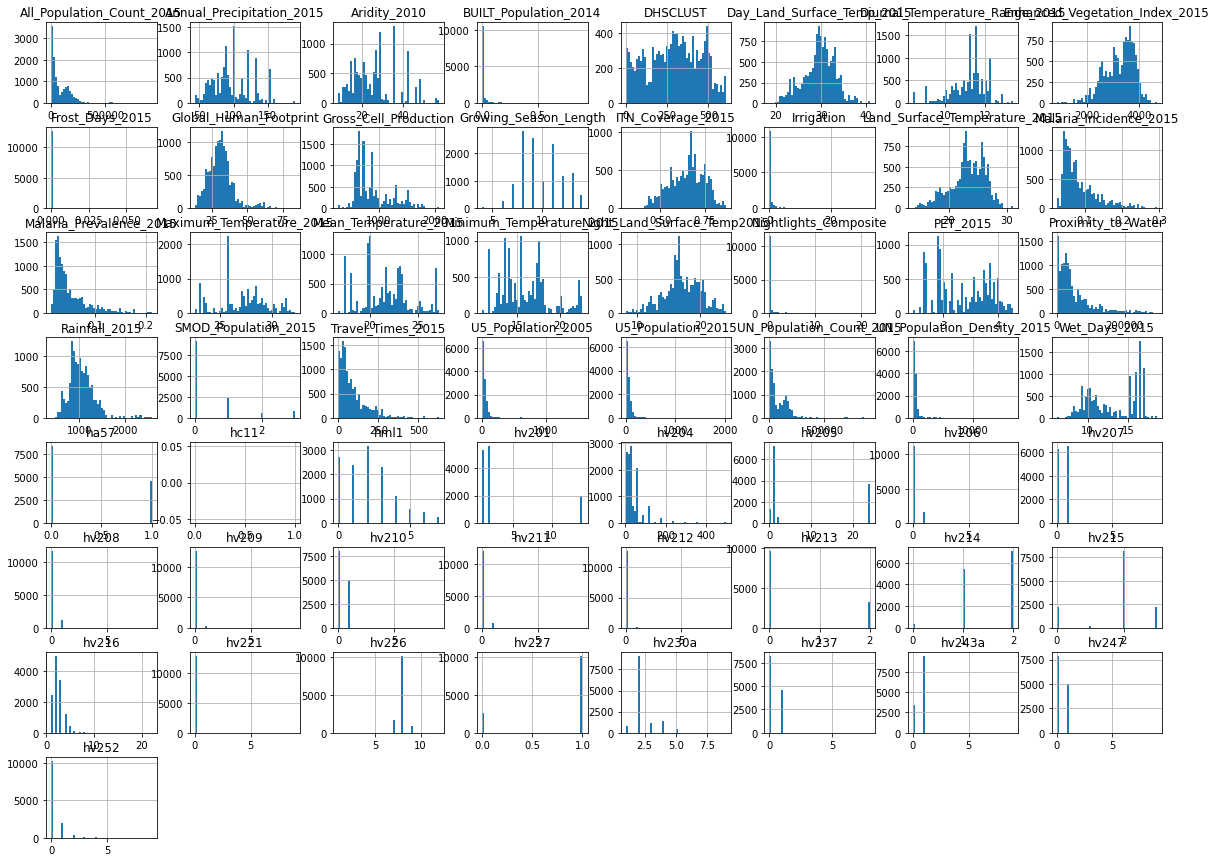

In [127]:
%matplotlib inline
import matplotlib.pyplot as plt
new.hist(bins=50, figsize=(20,15))
plt.show()

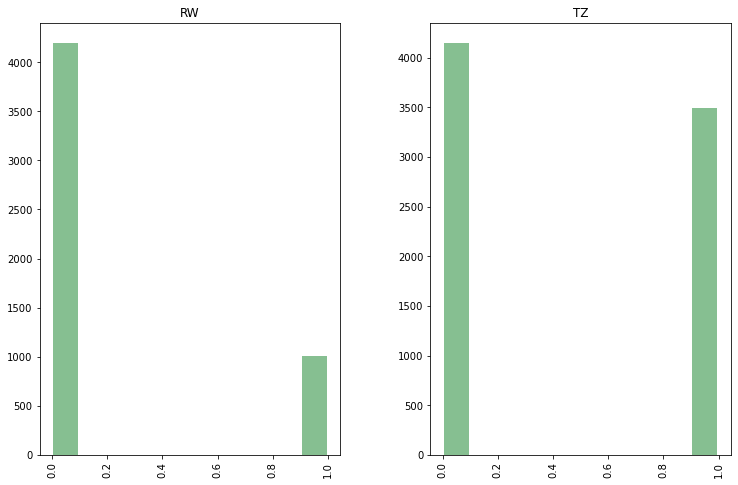

In [128]:
# distribution of anaemia
ax = new.hist(column='ha57', by = "DHSCC", grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

In [129]:
new = new.dropna(subset=['ha57'])

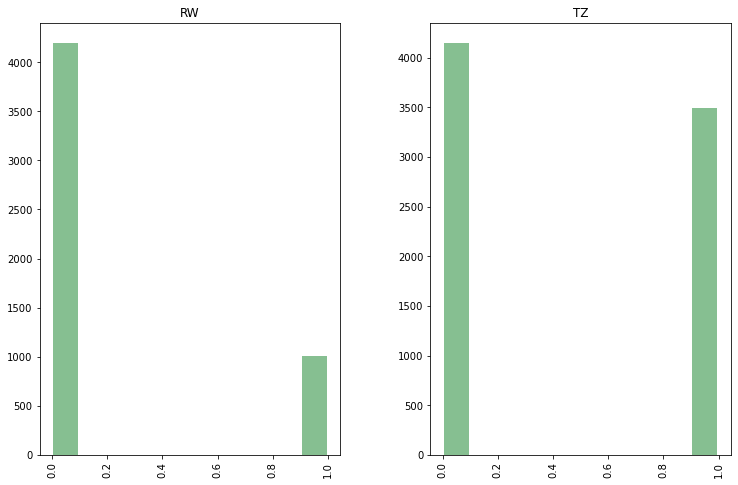

In [130]:
ax = new.hist(column='ha57', by = "DHSCC", grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

In [131]:
# new['hs57'].crosstab()

In [132]:
new['ha57'] = pd.Categorical(new.ha57)

In [133]:
y = new['ha57']

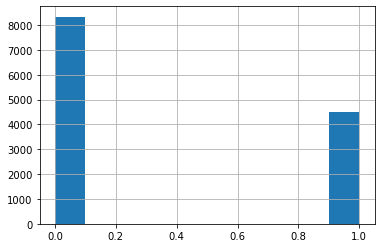

In [134]:
y.hist()

In [135]:
y.describe()

count     12841.0
unique        2.0
top           0.0
freq       8339.0
Name: ha57, dtype: float64

In [136]:
X = new.drop(['ha57', 'hc11','DHSCC', 'DHSCLUST'], axis = 1)

In [137]:
X.describe()

,hv201,hv204,hv205,hv206,hv207,hv208,hv209,hv210,hv211,hv212,...,PET_2015,Proximity_to_Water,Rainfall_2015,SMOD_Population_2015,Travel_Times_2015,U5_Population_2005,U5_Population_2015,UN_Population_Count_2015,UN_Population_Density_2015,Wet_Days_2015
count,12841.000000,12841.000000,12841.000000,12841.000000,12841.000000,12841.000000,12841.000000,12841.000000,12841.000000,12841.000000,...,12841.000000,12841.000000,12841.000000,12841.000000,12841.000000,12841.000000,12841.000000,12841.000000,12841.000000,12841.000000
mean,3.397633,42.178179,7.572463,0.127716,0.509306,0.092205,0.023285,0.377385,0.064948,0.010825,...,3.361567,52225.143015,1047.216903,0.452068,89.548603,62.916138,82.794206,89004.760834,598.809143,13.004483
std,4.492480,51.092237,10.456671,0.365846,0.505510,0.325790,0.198914,0.490501,0.257570,0.127733,...,0.478913,55978.808795,287.723975,0.833991,88.575005,147.297777,192.186932,106834.032449,1315.795345,3.049468
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.450000,0.000000,373.818182,0.000000,0.000000,0.279527,0.382598,47.931122,0.151325,6.175833
25%,1.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.958333,15864.897360,860.400000,0.000000,29.733333,8.975997,12.279464,18009.960938,90.190898,10.200833
50%,2.000000,30.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.350000,32533.588980,1008.400000,0.000000,61.078591,29.028429,38.236400,49095.031250,291.320443,12.447499
75%,2.000000,60.000000,24.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,3.791667,67410.777170,1184.100000,1.000000,120.142857,60.846472,78.429549,143249.562500,547.835074,15.912499
max,14.000000,500.000000,24.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,4.283333,295739.776600,2589.000000,3.000000,628.839142,1574.178850,2028.777204,913433.375000,16723.025670,18.550833


In [138]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12841 entries, 2 to 83561
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hv201                           12841 non-null  float64
 1   hv204                           12841 non-null  float64
 2   hv205                           12841 non-null  float64
 3   hv206                           12841 non-null  float64
 4   hv207                           12841 non-null  float64
 5   hv208                           12841 non-null  float64
 6   hv209                           12841 non-null  float64
 7   hv210                           12841 non-null  float64
 8   hv211                           12841 non-null  float64
 9   hv212                           12841 non-null  float64
 10  hv213                           12841 non-null  float64
 11  hv214                           12841 non-null  float64
 12  hv215                           

In [139]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [140]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression( solver = 'liblinear', random_state = 42)
lr.fit(X_train,y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [141]:
y_pred_LR = lr.predict(X_test)

In [142]:
from sklearn.metrics import classification_report, confusion_matrix
CM = confusion_matrix(y_test, y_pred_LR)
print(confusion_matrix(y_test, y_pred_LR))
print(classification_report(y_test, y_pred_LR))


TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

# True Negative Rate | Specificity

FNR = FN / (TP + FN)
print(FNR)

# When true positive + false positive == 0, precision returns 0 and raises UndefinedMetricWarning. This behavior can be modified with zero_division.
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))


[[1585   99]
 [ 776  109]]
              precision    recall  f1-score   support

         0.0       0.67      0.94      0.78      1684
         1.0       0.52      0.12      0.20       885

    accuracy                           0.66      2569
   macro avg       0.60      0.53      0.49      2569
weighted avg       0.62      0.66      0.58      2569

0.8768361581920904
0.6784741144414169


import matplotlib.pyplot as plt
import itertools # construct specialized tools
def plot_confusion_matrix(cm, classes,normalize = False, title = 'Confusion matrix', cmap = plt.cm.Blues):
    
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title, fontsize = 22)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45, fontsize = 13)
    plt.yticks(tick_marks, classes, fontsize = 13)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 fontsize = 15,
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label', fontsize = 16)
    plt.xlabel('Predicted label', fontsize = 16)

# Compute confusion matrix

cnf_matrix = confusion_matrix(y_test, y_pred_LR, labels = [1,0])
np.set_printoptions(precision = 2)

# Plot non-normalized confusion matrix

plt.figure()
plot_confusion_matrix(cnf_matrix, classes = ['anemic=1','not anemic=0'], normalize = False,  title = 'Confusion matrix')
plt.savefig('confusion_matrix.png')

In [20]:
# or using accuracy scores
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_LR)

0.659400544959128

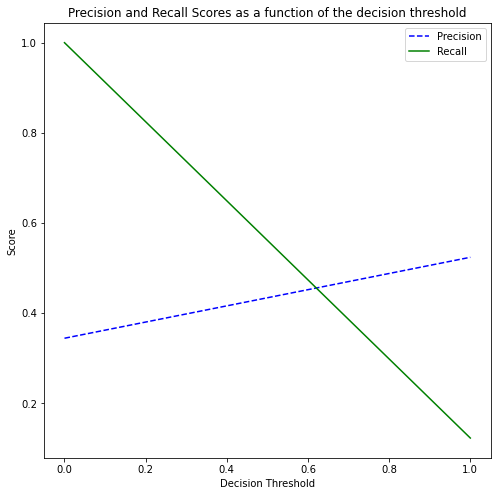

In [23]:
# plot ROC curve
import numpy as np
from sklearn.metrics import precision_recall_curve
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    """
    Modified from:
    Hands-On Machine learning with Scikit-Learn
    and TensorFlow; p.89
    """
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')
p, r, thresholds = precision_recall_curve(y_test, y_pred_LR)
plot_precision_recall_vs_threshold(p, r, thresholds)

In [ ]:
# ROC curve

In [90]:
# define models and parameters
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
model = LogisticRegression()
solvers = ['liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=1, cv=cv, scoring='recall',error_score=0)
grid_result = grid_search.fit(X, y)

In [91]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.158154 using {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.155340 (0.027330) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.158154 (0.029733) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.152005 (0.020080) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.158073 (0.029830) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.157114 (0.025303) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}


In [92]:
# best c is 10. runnning with that value. 
from sklearn.linear_model import LogisticRegression
lr_2 = LogisticRegression(C = 10, solver = 'liblinear', random_state = 42)
lr_2.fit(X_train,y_train)

LogisticRegression(C=10, random_state=42, solver='liblinear')

In [120]:
# compare this to validation

y_pred_val = lr_2.predict(X_val)

In [143]:
from sklearn.metrics import classification_report, confusion_matrix
CM = confusion_matrix(y_val, y_pred_val)
print(confusion_matrix(y_val, y_pred_val))
print(classification_report(y_val, y_pred_val))


TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

# True Negative Rate | Specificity

FNR = FN / (TN + FN)
print(FNR)

# When true positive + false positive == 0, precision returns 0 and raises UndefinedMetricWarning. This behavior can be modified with zero_division.

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred_val))

[[1559   92]
 [ 820   97]]
              precision    recall  f1-score   support

         0.0       0.66      0.94      0.77      1651
         1.0       0.51      0.11      0.18       917

    accuracy                           0.64      2568
   macro avg       0.58      0.53      0.47      2568
weighted avg       0.60      0.64      0.56      2568

0.344682639764607


ValueError: Found input variables with inconsistent numbers of samples: [2569, 2568]

In [95]:
# plot ROC curve
import numpy as np
from sklearn.metrics import precision_recall_curve

In [51]:
p, r, thresholds = precision_recall_curve(y_val, y_pred_val)
plot_precision_recall_vs_threshold(p, r, thresholds)

In [53]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    """
    Modified from:
    Hands-On Machine learning with Scikit-Learn
    and TensorFlow; p.89
    """
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')

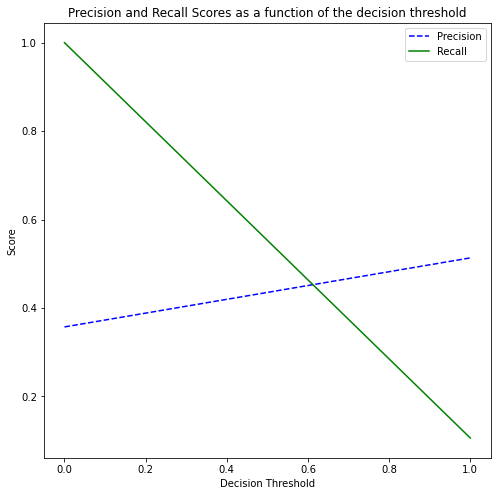

In [54]:
plot_precision_recall_vs_threshold(p, r, thresholds)

In [96]:
# Decision Trees
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state = 42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [97]:
y_pred_DT = classifier.predict(X_test)

In [99]:
from sklearn.metrics import classification_report, confusion_matrix
CM = confusion_matrix(y_test, y_pred_DT)
print(confusion_matrix(y_test, y_pred_DT))
print(classification_report(y_test, y_pred_DT))


TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]


# True Negative Rate | Specificity


FNR = FN / (TN + FN)
print(FNR)


# or using accuracy scores
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_DT)


[[1192  492]
 [ 492  393]]
              precision    recall  f1-score   support

         0.0       0.71      0.71      0.71      1684
         1.0       0.44      0.44      0.44       885

    accuracy                           0.62      2569
   macro avg       0.58      0.58      0.58      2569
weighted avg       0.62      0.62      0.62      2569

0.2921615201900237


0.6169715842740366

import matplotlib.pyplot as plt
import itertools # construct specialized tools
def plot_confusion_matrix(cm, classes,normalize = False, title = 'Confusion matrix', cmap = plt.cm.Blues):
    
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title, fontsize = 22)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45, fontsize = 13)
    plt.yticks(tick_marks, classes, fontsize = 13)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 fontsize = 15,
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label', fontsize = 16)
    plt.xlabel('Predicted label', fontsize = 16)

# Compute confusion matrix

cnf_matrix = confusion_matrix(y_test, y_pred_DT, labels = [1,0])
np.set_printoptions(precision = 2)

# Plot non-normalized confusion matrix

plt.figure()
plot_confusion_matrix(cnf_matrix, classes = ['anemic=1','not anemic=0'], normalize = False,  title = 'Confusion matrix')
plt.savefig('confusion_matrix.png')

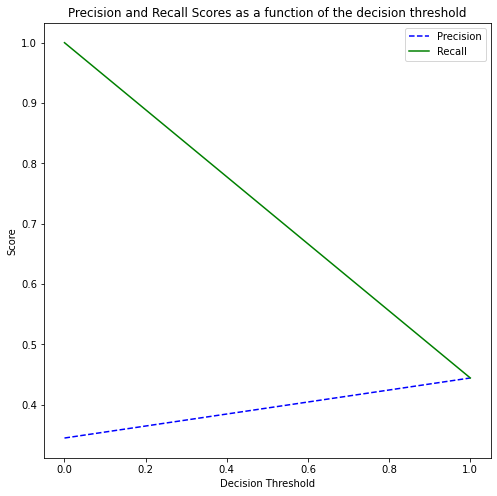

In [57]:
p, r, thresholds = precision_recall_curve(y_test, y_pred_DT)
plot_precision_recall_vs_threshold(p, r, thresholds)

In [100]:
# Grid search for Decision Trees
from sklearn import tree
from sklearn.model_selection import GridSearchCV
import random
from random import randint

In [101]:
max_depth_range = range(1,10)
min_samples_leaf_range = range(1,10)
parameters = {'criterion': ['gini'], 'max_depth': max_depth_range, 'min_samples_leaf': min_samples_leaf_range}
clf = GridSearchCV(DecisionTreeClassifier(), parameters, n_jobs=4, cv= 5)
clf.fit(X=X, y=y)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_)

0.5652142305392961 {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1}


In [102]:
from sklearn.tree import DecisionTreeClassifier
classifier2 = DecisionTreeClassifier(max_depth = 2, min_samples_leaf = 1, random_state = 42)
classifier2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [103]:
y_pred_val = classifier2.predict(X_val)

In [105]:
from sklearn.metrics import classification_report, confusion_matrix
CM = confusion_matrix(y_val, y_pred_val)
print(confusion_matrix(y_val, y_pred_val))
print(classification_report(y_val, y_pred_val))


TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

# True Negative Rate | Specificity

FNR = FN / (TN + FN)
print(FNR)

# When true positive + false positive == 0, precision returns 0 and raises UndefinedMetricWarning. This behavior can be modified with zero_division.

from sklearn.metrics import precision_score
precision_score(y_val, y_pred_val, average=None, zero_division=1)

[[1184  467]
 [ 377  540]]
              precision    recall  f1-score   support

         0.0       0.76      0.72      0.74      1651
         1.0       0.54      0.59      0.56       917

    accuracy                           0.67      2568
   macro avg       0.65      0.65      0.65      2568
weighted avg       0.68      0.67      0.67      2568

0.2828588734100545


array([0.75848815, 0.53624628])

In [ ]:
# now the SVM classifier. 

In [106]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [107]:
from sklearn.svm import LinearSVC

lin_svc = LinearSVC(max_iter=100000,random_state=42)
lin_svc.fit(X_train_scaled, y_train)
y_pred = lin_svc.predict(X_test_scaled)

In [108]:
from sklearn.metrics import classification_report, confusion_matrix
CM = confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]


# True Negative Rate | Specificity

FNR = FN / (TN + FN)
print(FNR)


# or using accuracy scores
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)


[[1412  272]
 [ 554  331]]
              precision    recall  f1-score   support

         0.0       0.72      0.84      0.77      1684
         1.0       0.55      0.37      0.44       885

    accuracy                           0.68      2569
   macro avg       0.63      0.61      0.61      2569
weighted avg       0.66      0.68      0.66      2569

0.16152019002375298


0.6784741144414169

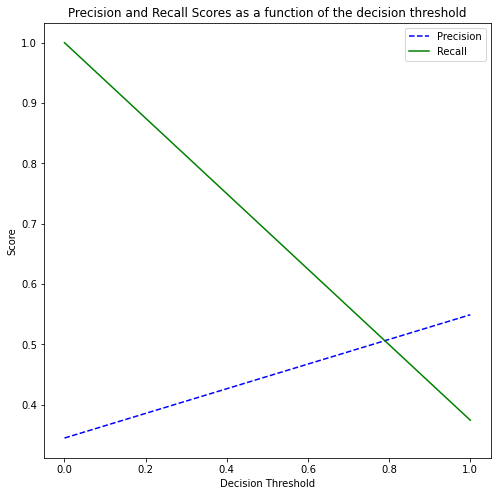

In [110]:
p, r, thresholds = precision_recall_curve(y_test, y_pred)
plot_precision_recall_vs_threshold(p, r, thresholds)

import matplotlib.pyplot as plt
import itertools # construct specialized tools
def plot_confusion_matrix(cm, classes,normalize = False, title = 'Confusion matrix', cmap = plt.cm.Blues):
    
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title, fontsize = 22)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45, fontsize = 13)
    plt.yticks(tick_marks, classes, fontsize = 13)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 fontsize = 15,
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label', fontsize = 16)
    plt.xlabel('Predicted label', fontsize = 16)

# Compute confusion matrix

cnf_matrix = confusion_matrix(y_test, y_pred, labels = [1,0])
np.set_printoptions(precision = 2)

# Plot non-normalized confusion matrix

plt.figure()
plot_confusion_matrix(cnf_matrix, classes = ['anemic=1','not anemic=0'], normalize = False,  title = 'Confusion matrix')
plt.savefig('confusion_matrix.png')

In [ ]:
p, r, thresholds = precision_recall_curve(y_val, y_pred)
plot_precision_recall_vs_threshold(p, r, thresholds)

In [109]:
# gridsearch SVM
# example of grid searching key hyperparametres for SVC
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
# define model and parameters
model = SVC()
kernel = ['rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='recall',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.359258 using {'C': 50, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.010958 (0.005377) with: {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
0.359258 (0.056142) with: {'C': 50, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.012216 (0.005247) with: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.358961 (0.056188) with: {'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.009477 (0.004439) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
0.357628 (0.057306) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.000000 (0.000000) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
0.346967 (0.051038) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.000000 (0.000000) with: {'C': 0.01, 'gamma': 'scale', 'kernel': 'rbf'}
0.185165 (0.122583) with: {'C': 0.01, 'gamma': 'scale', 'kernel': 'sigmoid'}


In [147]:
from sklearn.svm import LinearSVC
lin_svc2 = LinearSVC(max_iter=100000,C = 0.01, random_state=42)
lin_svc2.fit(X_train_scaled, y_train)
y_pred = lin_svc2.predict(X_test_scaled)

In [73]:
from sklearn.metrics import classification_report, confusion_matrix
CM = confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

FPR = FP / (TN + FP)
print(FPR)

# or using accuracy scores
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)


[[1412  272]
 [ 554  331]]
              precision    recall  f1-score   support

         0.0       0.72      0.84      0.77      1684
         1.0       0.55      0.37      0.44       885

    accuracy                           0.68      2569
   macro avg       0.63      0.61      0.61      2569
weighted avg       0.66      0.68      0.66      2569

0.7182095625635809


0.6784741144414169

In [87]:
# dimensionality reduction

from sklearn.decomposition import PCA
pca = PCA(.95)
X_red = pca.fit_transform(X_train)
X_red_test = pca.fit_transform(X_test)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_red, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)


print("Full dimensionality: {}".format(X.shape[1]))
print("Reduced dimensionality: {}".format(X_red.shape[1]))



ValueError: Found input variables with inconsistent numbers of samples: [600, 1000]

In [93]:
pca.explained_variance_ratio_

array([0.28, 0.1 , 0.1 , 0.08, 0.07, 0.07, 0.07, 0.07, 0.06, 0.05])

In [88]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver = 'liblinear', random_state = 42)
lr.fit(X_red, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [91]:
y_pred_LR = lr.predict(X_test)

In [92]:
from sklearn.metrics import classification_report, confusion_matrix
CM = confusion_matrix(y_test, y_pred_LR)
print(confusion_matrix(y_test, y_pred_LR))
print(classification_report(y_test, y_pred_LR))


TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

# True Negative Rate | Specificity

TNR = TN / (TN + FN)
print(TNR)

# When true positive + false positive == 0, precision returns 0 and raises UndefinedMetricWarning. This behavior can be modified with zero_division.

from sklearn.metrics import precision_score
precision_score(y_test, y_pred_LR, average=None, zero_division=1)

[[101   1]
 [  1  97]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       102
           1       0.99      0.99      0.99        98

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200

0.9901960784313726


array([0.99, 0.99])

In [149]:
# Decision Trees
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state = 42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [150]:
y_pred_DT = classifier.predict(X_test)

In [151]:
from sklearn.metrics import classification_report, confusion_matrix
CM = confusion_matrix(y_test, y_pred_DT)
print(confusion_matrix(y_test, y_pred_DT))
print(classification_report(y_test, y_pred_DT))


TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]


# True Negative Rate | Specificity

TNR = TN / (TN + FP)
print(TNR)


# or using accuracy scores
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_DT)


# ROC curve 

from sklearn.metrics import roc_curve
from sklearn.metrics import auc



[[100   2]
 [  1  97]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       102
           1       0.98      0.99      0.98        98

    accuracy                           0.98       200
   macro avg       0.98      0.99      0.98       200
weighted avg       0.99      0.98      0.99       200

0.9803921568627451


In [153]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [154]:
from sklearn.svm import LinearSVC
lin_svc = LinearSVC(max_iter=100000,random_state=42)
lin_svc.fit(X_train_scaled, y_train)
y_pred = lin_svc.predict(X_test_scaled)

In [155]:
from sklearn.metrics import classification_report, confusion_matrix
CM = confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]


# True Negative Rate | Specificity

TNR = TN / (TN + FP)
print(TNR)


# or using accuracy scores
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)


# ROC curve 

from sklearn.metrics import roc_curve
from sklearn.metrics import auc


[[99  3]
 [ 3 95]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       102
           1       0.97      0.97      0.97        98

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200

0.9705882352941176


In [111]:

# random forests
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()    

In [112]:
clf = RandomForestClassifier(max_depth=2, random_state=0)

In [113]:
clf.fit(X, y)

RandomForestClassifier(max_depth=2, random_state=0)

In [114]:
y_rf = clf.predict(X_test)

In [115]:
from sklearn.metrics import classification_report, confusion_matrix
CM = confusion_matrix(y_test, y_rf)
print(confusion_matrix(y_test, y_rf))
print(classification_report(y_test, y_rf))


TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

FPR = FP / (TN + FP)
print(FPR)

# or using accuracy scores
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_rf)


[[1512  172]
 [ 636  249]]
              precision    recall  f1-score   support

         0.0       0.70      0.90      0.79      1684
         1.0       0.59      0.28      0.38       885

    accuracy                           0.69      2569
   macro avg       0.65      0.59      0.59      2569
weighted avg       0.67      0.69      0.65      2569

0.1021377672209026


0.6854807318022577

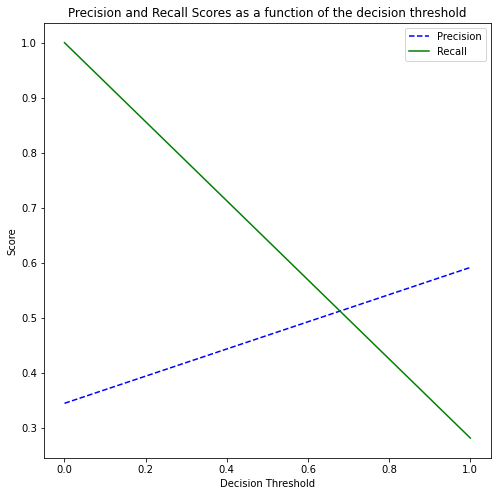

In [116]:
p, r, thresholds = precision_recall_curve(y_test, y_rf)
plot_precision_recall_vs_threshold(p, r, thresholds)

import matplotlib.pyplot as plt
import itertools # construct specialized tools
def plot_confusion_matrix(cm, classes,normalize = False, title = 'Confusion matrix', cmap = plt.cm.Blues):
    
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title, fontsize = 22)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45, fontsize = 13)
    plt.yticks(tick_marks, classes, fontsize = 13)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 fontsize = 15,
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label', fontsize = 16)
    plt.xlabel('Predicted label', fontsize = 16)

# Compute confusion matrix

cnf_matrix = confusion_matrix(y_test, y_rf, labels = [1,0])
np.set_printoptions(precision = 2)

# Plot non-normalized confusion matrix

plt.figure()
plot_confusion_matrix(cnf_matrix, classes = ['anemic=1','not anemic=0'], normalize = False,  title = 'Confusion matrix')
plt.savefig('confusion_matrix.png')

In [39]:
from sklearn.model_selection import GridSearchCV

param_grid = {  'bootstrap': [True], 'max_depth': [5, 10, None], 'max_features': ['auto', 'log2'], 'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

In [41]:
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor



In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier

In [48]:
model_params = {
    'n_estimators': [50, 150, 250],
    'max_features': ['sqrt', 0.25, 0.5, 0.75, 1.0],
    'min_samples_split': [2, 4, 6]
}

In [49]:
# create random forest classifier model
rf_model = RandomForestClassifier(random_state=1)

# set up grid search meta-estimator
clf = GridSearchCV(rf_model, model_params, cv=5)

# train the grid search meta-estimator to find the best model
model = clf.fit(X, y)

# print winning set of hyperparameters
from pprint import pprint
pprint(model.best_estimator_.get_params())

KeyboardInterrupt: 

In [ ]:
predictions = model.predict(X)
print(predictions)

In [144]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [145]:
fs = SelectKBest(score_func=f_classif, k=2)
# apply feature selection
X_selected = fs.fit_transform(X, y)
print(X_selected.shape)

(12841, 2)


AttributeError: 'numpy.ndarray' object has no attribute 'info'